In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
gold=pd.read_csv('gld_price_data.csv')

In [12]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,3
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,4
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,7
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,8


In [4]:
gold.shape

(2290, 6)

In [5]:
gold.isnull().sum() ## Notice the data type 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold['Date']=pd.to_datetime(gold['Date'])

In [8]:
gold['Date'] ## Notice the data type ## format is yyyy-mm-dd

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
          ...    
2285   2018-05-08
2286   2018-05-09
2287   2018-05-10
2288   2018-05-14
2289   2018-05-16
Name: Date, Length: 2290, dtype: datetime64[ns]

In [9]:
gold['day']=gold['Date'].apply(lambda date:date.day)

In [13]:
gold['month']=gold['Date'].apply(lambda date:date.month)

In [14]:
gold['year']=gold['Date'].apply(lambda date:date.year)

In [17]:
gold.drop('Date',axis=1,inplace=True)

In [18]:
gold.head()

,SPX,GLD,USO,SLV,EUR/USD,day,month,year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [20]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD,day,month,year
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,15.644541,6.329258,2012.724891
std,519.111540,23.283346,19.523517,7.092566,0.131547,8.746132,3.591149,2.993271
min,676.530029,70.000000,7.960000,8.850000,1.039047,1.000000,1.000000,2008.000000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,8.000000,3.000000,2010.000000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,15.500000,6.000000,2013.000000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,23.000000,10.000000,2015.000000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,31.000000,12.000000,2018.000000


<AxesSubplot:>

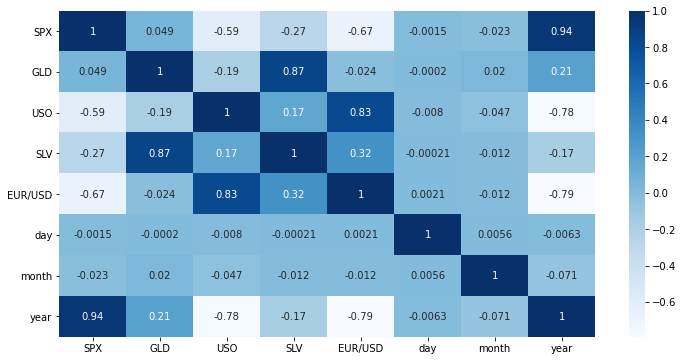

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(gold.corr(),annot=True,cmap='Blues') ## Day and month looks like  has no correltion , we can deop it 

In [35]:
gold.drop(['day','month'],axis=1,inplace=True)

In [36]:
gold.head()

,SPX,GLD,USO,SLV,EUR/USD,year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008


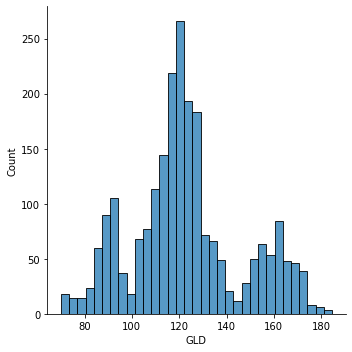

In [31]:
sns.displot(gold['GLD'])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=gold.drop('GLD',axis=1)
y=gold['GLD']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor=RandomForestRegressor(n_estimators=100)

In [44]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
from sklearn import metrics

In [49]:
predict=regressor.predict(X_test)

In [50]:
error_score=metrics.r2_score(y_test,predict)
error_score

0.9906198734800783

In [51]:
y_test=list(y_test)

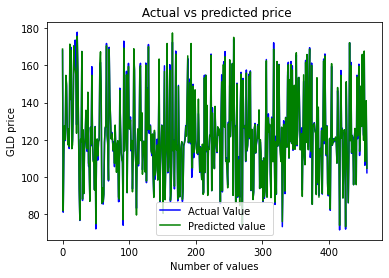

In [52]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(predict,color='green', label='Predicted value ')
plt.title(' Actual vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()